In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model

In [2]:
nba = %pip install nba_api


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from nba_api.stats.endpoints import leaguegamefinder

In [4]:
nba = leaguegamefinder.LeagueGameFinder(date_from_nullable='10/10/2022')
games = nba.get_data_frames()[0]
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1612709902,SCW,Santa Cruz Warriors,2022200437,2023-03-18,SCW vs. IWA,W,240,132,...,0.765,25,33,58,28,8,7,10,17,20.0
1,22022,1612709932,MCC,Motor City Cruise,2022200430,2023-03-18,MCC vs. WES,W,240,122,...,0.714,16,43,59,29,8,4,13,14,10.0
2,22022,1612709917,GRG,Grand Rapids Gold,2022200432,2023-03-18,GRG @ CPS,W,240,102,...,0.846,11,39,50,26,10,6,23,22,9.4
3,22022,1612709922,GBO,Greensboro Swarm,2022200434,2023-03-18,GBO @ AUS,W,240,127,...,0.773,4,30,34,22,9,4,11,22,1.4
4,22022,1610612758,SAC,Sacramento Kings,0022201059,2023-03-18,SAC @ WAS,W,238,132,...,0.609,7,37,44,34,7,7,8,22,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,12022,1610612764,WAS,Washington Wizards,0012200043,2022-10-10,WAS @ CHA,W,241,116,...,0.737,11,25,36,29,10,6,12,20,9.0
4402,12022,1610612745,HOU,Houston Rockets,0012200045,2022-10-10,HOU @ MIA,L,239,110,...,0.706,14,35,49,27,9,6,25,25,-8.0
4403,12022,1610612743,DEN,Denver Nuggets,0012200046,2022-10-10,DEN vs. PHX,W,241,107,...,0.611,10,30,40,21,9,3,12,23,2.0
4404,12022,1610612739,CLE,Cleveland Cavaliers,0012200044,2022-10-10,CLE vs. PHI,L,242,97,...,0.649,13,36,49,20,4,6,16,15,-16.0


In [5]:
games = games[['GAME_DATE','TEAM_NAME','WL','PTS']]
games

,GAME_DATE,TEAM_NAME,WL,PTS
0,2023-03-18,Santa Cruz Warriors,W,132
1,2023-03-18,Motor City Cruise,W,122
2,2023-03-18,Grand Rapids Gold,W,102
3,2023-03-18,Greensboro Swarm,W,127
4,2023-03-18,Sacramento Kings,W,132
...,...,...,...,...
4401,2022-10-10,Washington Wizards,W,116
4402,2022-10-10,Houston Rockets,L,110
4403,2022-10-10,Denver Nuggets,W,107
4404,2022-10-10,Cleveland Cavaliers,L,97


In [7]:
win = games[games['WL'].str.contains('W')]
lose = games[games['WL'].str.contains('L')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [8]:
alt = games[games['TEAM_NAME']=='Atlanta Hawks']['WL'].value_counts()
bos = games[games['TEAM_NAME']=='Boston Celtics']['WL'].value_counts()
chi = games[games['TEAM_NAME']=='Chicago Bulls']['WL'].value_counts()
nop = games[games['TEAM_NAME']=='New Orleans Pelicans']['WL'].value_counts()
dal = games[games['TEAM_NAME']=='Dallas Mavericks']['WL'].value_counts()
hou = games[games['TEAM_NAME']=='Houston Rockets']['WL'].value_counts()
den = games[games['TEAM_NAME']=='Denver Nuggets']['WL'].value_counts()
lac = games[games['TEAM_NAME']=='LA Clippers']['WL'].value_counts()
lal = games[games['TEAM_NAME']=='Los Angeles Lakers']['WL'].value_counts()
mia = games[games['TEAM_NAME']=='Miami Heat']['WL'].value_counts()
mil = games[games['TEAM_NAME']=='Milwaukee Bucks']['WL'].value_counts()
minn = games[games['TEAM_NAME']=='Minnesota Timberwolves']['WL'].value_counts()
bkn = games[games['TEAM_NAME']=='Brooklyn Nets']['WL'].value_counts()
nyk = games[games['TEAM_NAME']=='New York Knicks']['WL'].value_counts()
ind = games[games['TEAM_NAME']=='Indiana Pacers']['WL'].value_counts()
phi = games[games['TEAM_NAME']=='Philadelphia 76ers']['WL'].value_counts()
por = games[games['TEAM_NAME']=='Portland Trail Blazers']['WL'].value_counts()
phx = games[games['TEAM_NAME']=='Phoenix Suns']['WL'].value_counts()
orl = games[games['TEAM_NAME']=='Orlando Magic']['WL'].value_counts()
sas = games[games['TEAM_NAME']=='San Antonio Spurs']['WL'].value_counts()
sto = games[games['TEAM_NAME']=='Stockton Kings']['WL'].value_counts()
okl = games[games['TEAM_NAME']=='Oklahoma City Thunder']['WL'].value_counts()
tor = games[games['TEAM_NAME']=='Toronto Raptors']['WL'].value_counts()
uta = games[games['TEAM_NAME']=='Utah Jazz']['WL'].value_counts()
mem = games[games['TEAM_NAME']=='Memphis Grizzlies']['WL'].value_counts()
was = games[games['TEAM_NAME']=='Washington Wizards']['WL'].value_counts()
det = games[games['TEAM_NAME']=='Detroit Pistons']['WL'].value_counts()
cha = games[games['TEAM_NAME']=='Charlotte Hornets']['WL'].value_counts()
cle = games[games['TEAM_NAME']=='Cleveland Cavaliers']['WL'].value_counts()
gsw = games[games['TEAM_NAME']=='Golden State Warriors']['WL'].value_counts()
games1 = pd.DataFrame([alt,bos,chi,nop,dal,hou,den,lac,lal,mia,mil,minn,bkn,nyk,ind,phi,phx,por,orl,sas,sto,okl,tor
                  ,uta,mem,was,det,cha,cle,gsw])

In [9]:
games1.index = ['Atlanta Hawks','Boston Celtics','Chicago Bulls','New Orleans Pelicans','Dallas Mavericks',
              'Houston Rockets','Denver Nuggets','LA Clippers','Los Angeles Lakers','Miami Heat','Milwaukee Bucks',
              'Minnesota Timberwolves','Brooklyn Nets','New York Knicks','Indiana Pacers','Philadelphia 76ers',
              'Portland Trail Blazers','Phoenix Suns','Orlando Magic','San Antonio Spurs','Stockton Kings',
              'Oklahoma City Thunder','Toronto Raptors','Utah Jazz','Memphis Grizzlies','Washington Wizards',
              'Detroit Pristons','Charlotte Hornets','Cleveland Cavaliers','Golden State Warriors']

In [10]:
print(games1)

                         L   W
Atlanta Hawks           37  35
Boston Celtics          24  49
Chicago Bulls           37  34
New Orleans Pelicans    38  34
Dallas Mavericks        35  37
Houston Rockets         53  19
Denver Nuggets          24  50
LA Clippers             35  37
Los Angeles Lakers      39  34
Miami Heat              34  40
Milwaukee Bucks         22  50
Minnesota Timberwolves  38  36
Brooklyn Nets           31  41
New York Knicks         31  43
Indiana Pacers          40  33
Philadelphia 76ers      22  50
Portland Trail Blazers  34  38
Phoenix Suns            40  31
Orlando Magic           42  31
San Antonio Spurs       53  19
Stockton Kings          16  31
Oklahoma City Thunder   36  36
Toronto Raptors         36  36
Utah Jazz               38  34
Memphis Grizzlies       28  44
Washington Wizards      40  33
Detroit Pristons        57  16
Charlotte Hornets       52  22
Cleveland Cavaliers     30  46
Golden State Warriors   37  37


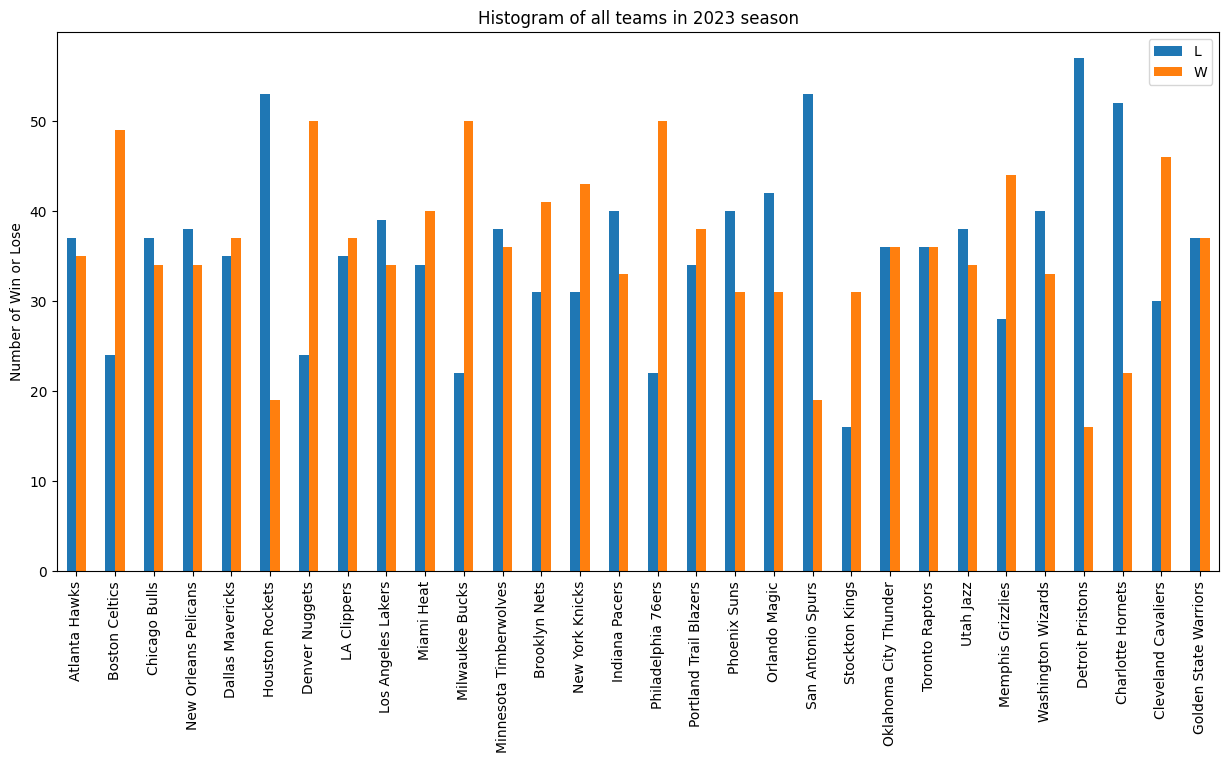

In [11]:
plt_win_lose = pd.DataFrame(games1)
plt_win_lose.plot.bar(figsize=(15,7), title='Histogram of all teams in 2023 season', ylabel='Number of Win or Lose')
plt.show()

In [11]:
alt_pts=games[games.TEAM_NAME=='Atlanta Hawks']['PTS']
bos_pts=games[games.TEAM_NAME=='Boston Celtics']['PTS']
nop_pts=games[games.TEAM_NAME=='New Orleans Pelicans']['PTS']
chi_pts=games[games.TEAM_NAME=='Chicago Bulls']['PTS']
dal_pts=games[games.TEAM_NAME=='Dallas Mavericks']['PTS']
hou_pts=games[games.TEAM_NAME=='Houston Rockets']['PTS']
den_pts=games[games.TEAM_NAME=='Denver Nuggets']['PTS']
lac_pts=games[games.TEAM_NAME=='LA Clippers']['PTS']
lal_pts=games[games.TEAM_NAME=='Los Angeles Lakers']['PTS']
mia_pts=games[games.TEAM_NAME=='Miami Heat']['PTS']
mil_pts=games[games.TEAM_NAME=='Milwaukee Bucks']['PTS']
min_pts=games[games.TEAM_NAME=='Minnesota Timberwolves']['PTS']
bkn_pts=games[games.TEAM_NAME=='Brooklyn Nets']['PTS']
nyk_pts=games[games.TEAM_NAME=='New York Knicks']['PTS']
ind_pts=games[games.TEAM_NAME=='Indiana Pacers']['PTS']
phi_pts=games[games.TEAM_NAME=='Philadelphia 76ers']['PTS']
por_pts=games[games.TEAM_NAME=='Portland Trail Blazers']['PTS']
phx_pts=games[games.TEAM_NAME=='Phoenix Suns']['PTS']
orl_pts=games[games.TEAM_NAME=='Orlando Magic']['PTS']
sas_pts=games[games.TEAM_NAME=='San Antonio Spurs']['PTS']
sto_pts=games[games.TEAM_NAME=='Stockton Kings']['PTS']
okl_pts=games[games.TEAM_NAME=='Oklahoma City Thunder']['PTS']
tor_pts=games[games.TEAM_NAME=='Toronto Raptors']['PTS']
uta_pts=games[games.TEAM_NAME=='Utah Jazz']['PTS']
mem_pts=games[games.TEAM_NAME=='Memphis Grizzlies']['PTS']
was_pts=games[games.TEAM_NAME=='Washington Wizards']['PTS']
det_pts=games[games.TEAM_NAME=='Detroit Pistons']['PTS']
cha_pts=games[games.TEAM_NAME=='Charlotte Hornets']['PTS']
cle_pts=games[games.TEAM_NAME=='Cleveland Cavaliers']['PTS']
gsw_pts=games[games.TEAM_NAME=='Golden State Warriors']['PTS']

In [12]:
games2 = pd.DataFrame([alt_pts,bos_pts,chi_pts,nop_pts,dal_pts,hou_pts,den_pts,lac_pts,lal_pts,mia_pts,
                       mil_pts,min_pts,bkn_pts,nyk_pts,ind_pts,phi_pts,phx_pts,por_pts,orl_pts,sas_pts,sto_pts,
                       okl_pts,tor_pts,uta_pts,mem_pts,was_pts,det_pts,cha_pts,cle_pts,gsw_pts])

(array([ 3.,  3.,  8.,  6., 13.,  9., 10., 11.,  1.,  2.]),
 array([ 87. ,  92.5,  98. , 103.5, 109. , 114.5, 120. , 125.5, 131. ,
        136.5, 142. ]),
 <BarContainer object of 10 artists>)

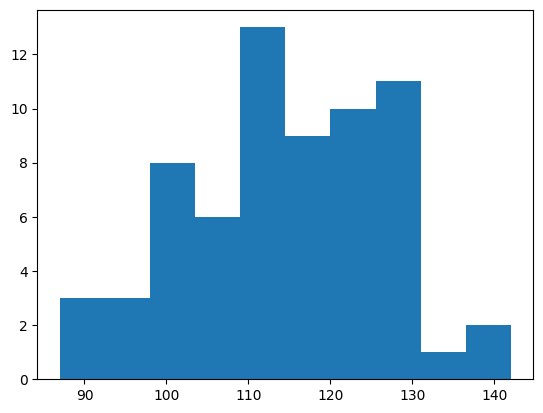

In [14]:
plt.hist(dal_pts)